In [8]:
# 导入模块、数据、预处理、onehot
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# 加载数据集
wine = load_wine()
X = wine.data  # 特征
y = wine.target  # 标签

# 七三制划分
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y)

# 特征标准化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 多分类问题，将标签转换为one-hot编码
lb = LabelBinarizer()
y_train_onehot = lb.fit_transform(y_train)
y_test_onehot = lb.transform(y_test)

In [9]:
# 构建顺序模型、加层
model = tf.keras.models.Sequential()

# 添加输入层
model.add(tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
# 添加隐藏层
model.add(tf.keras.layers.Dense(32, activation='relu'))
# 添加输出层 softmax用于多分类
model.add(tf.keras.layers.Dense(3, activation='softmax'))
# 显示结构
model.summary()

C:\Users\siyu_\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,075 (12.01 KB)

 Trainable params: 3,075 (12.01 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# 编译、训练模型
model.compile(optimizer='adam', loss='categorical_crossentropy', 
    metrics=['accuracy'])  # 多分类交叉熵损失,评估指标为准确率

history = model.fit(X_train_scaled, y_train_onehot,
                    batch_size=64,epochs=10,)
# 评估
model.evaluate(X_test_scaled, y_test_onehot, batch_size=64, verbose=2)

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.3629 - loss: 1.1636
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4597 - loss: 1.0685 
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.5806 - loss: 0.9824 
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.6774 - loss: 0.9024 
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.7581 - loss: 0.8315
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.8145 - loss: 0.7660 
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.8871 - loss: 0.7073 
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.8871 - loss: 0.6557 
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.9032 - loss: 0.6068 
Epoch 10/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.9194 - loss: 0.5600
1/1 - 0s - 305ms/step - accuracy: 0.9259 - loss: 0.5903


[0.5903409123420715, 0.9259259104728699]

              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        18
     class_1       0.95      0.86      0.90        21
     class_2       0.82      0.93      0.88        15

    accuracy                           0.93        54
   macro avg       0.92      0.93      0.92        54
weighted avg       0.93      0.93      0.93        54



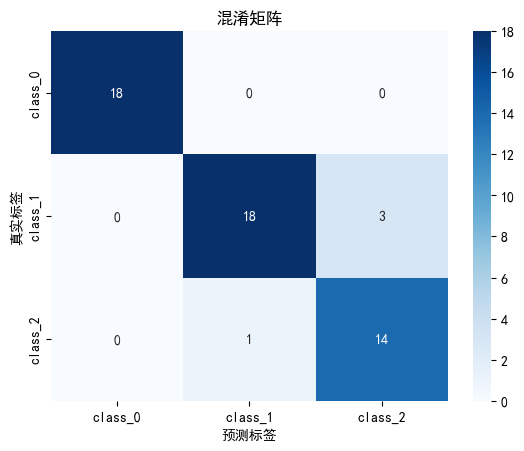

In [16]:
# 预测得到 y_pred
y_pred_proba = model.predict(X_test_scaled, verbose=0)
y_pred = np.argmax(y_pred_proba, axis=1)
# 分类报告
print(classification_report(y_test, y_pred, target_names=wine.target_names))

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

plt.figsize=(6, 8)
# 混淆矩阵
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=wine.target_names, 
            yticklabels=wine.target_names)
plt.title('混淆矩阵')
plt.xlabel('预测标签')
plt.ylabel('真实标签')
plt.show()